In [15]:
import keras
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.patches import Rectangle

In [16]:
data=pd.read_csv(
    "C:/Users/yeolume/source/data/01-image - 副本/plate_detect-export.csv"
    # "C:/Users/yeolume/source/data/01-image - 副本/cup-export.csv"
)

In [17]:
data.label.unique()

array(['gcup', 'cup', 'bowl', 'plate', 'spoon'], dtype=object)

In [18]:
data

,image,xmin,ymin,xmax,ymax,label
0,resize_1.jpg,80.094787,118.957346,143.601896,165.402844,gcup
1,resize_1.jpg,0.000000,190.047393,51.184834,261.137441,cup
2,resize_1.jpg,200.552961,157.345972,281.121682,210.742506,cup
3,resize_10.jpg,184.834123,115.402844,266.350711,182.701422,bowl
4,resize_10.jpg,0.236967,190.284360,83.175355,270.142180,bowl
...,...,...,...,...,...,...
1605,resize_7.jpg,156.398104,110.663507,228.199052,176.066351,bowl
1606,resize_7.jpg,87.914692,150.473934,149.289100,202.843602,cup
1607,resize_7.jpg,140.284360,195.497630,269.431280,313.270142,plate
1608,resize_7.jpg,291.943128,209.715640,374.170616,294.312796,bowl


In [19]:
# 加载图像
img = tf.io.read_file(
    "C:/Users/yeolume/source/data/01-image - 副本/images/resize_10.jpg"
)
# 进行编码解析
img = tf.image.decode_jpeg(img)

In [20]:
def show_rect(num):
    label=num
    xmin=int(data.xmin[label])
    ymin=int(data.ymin[label])
    xmax=int(data.xmax[label])
    ymax=int(data.ymax[label])
    print("xmin: {},ymin: {},xmax: {},ymax: {},name: {}".format(xmin,ymin,xmax,ymax,data.label[num]))
    plt.imshow(img)
    rect=Rectangle((xmin,ymin),
                   (xmax-xmin),
                   (ymax-ymin),
                   fill=False,
                   color='red')
    ax=plt.gca()
    ax.axes.add_patch(rect)

xmin: 184,ymin: 115,xmax: 266,ymax: 182,name: bowl
xmin: 0,ymin: 190,xmax: 83,ymax: 270,name: bowl
xmin: 1,ymin: 97,xmax: 70,ymax: 161,name: bowl
xmin: 343,ymin: 212,xmax: 400,ymax: 301,name: bowl
xmin: 343,ymin: 212,xmax: 400,ymax: 301,name: plate
xmin: 324,ymin: 99,xmax: 400,ymax: 181,name: plate
xmin: 186,ymin: 203,xmax: 325,ymax: 331,name: plate
xmin: 22,ymin: 269,xmax: 128,ymax: 365,name: bowl


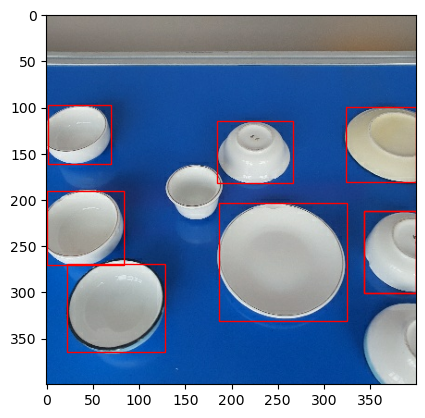

In [21]:
for i in range(3,11,1):
    show_rect(i)

In [22]:
label_to_index={'cup': 0, 'gcup': 1, 'bowl': 2, 'plate': 3, 'spoon': 4}

In [23]:
#创建个列表，来存储编码后的label值
all_image_label=[label_to_index[label] for label in data.label]
data['sort']=all_image_label
data

,image,xmin,ymin,xmax,ymax,label,sort
0,resize_1.jpg,80.094787,118.957346,143.601896,165.402844,gcup,1
1,resize_1.jpg,0.000000,190.047393,51.184834,261.137441,cup,0
2,resize_1.jpg,200.552961,157.345972,281.121682,210.742506,cup,0
3,resize_10.jpg,184.834123,115.402844,266.350711,182.701422,bowl,2
4,resize_10.jpg,0.236967,190.284360,83.175355,270.142180,bowl,2
...,...,...,...,...,...,...,...
1605,resize_7.jpg,156.398104,110.663507,228.199052,176.066351,bowl,2
1606,resize_7.jpg,87.914692,150.473934,149.289100,202.843602,cup,0
1607,resize_7.jpg,140.284360,195.497630,269.431280,313.270142,plate,3
1608,resize_7.jpg,291.943128,209.715640,374.170616,294.312796,bowl,2


In [24]:
#先创建空列表
data['x']=0
data['y']=0
data['w']=0
data['h']=0
#通过一个循环，计算x，y，w，h
for index in range(len(data)):
    xmin=data.xmax[index]
    xmax=data.xmin[index]
    ymin=data.ymin[index]
    ymax=data.ymax[index]
    data['x'][index]=((xmax+xmin)/2.0-1)/400.0
    data['y'][index]=((ymax+ymin)/2.0-1)/400.0
    data['w'][index]=(xmin-xmax)/400.0
    data['h'][index]=(ymax-ymin)/400.0


C:\Users\yeolume\AppData\Local\Temp\ipykernel_17480\1847501647.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x'][index]=((xmax+xmin)/2.0-1)/400.0
C:\Users\yeolume\AppData\Local\Temp\ipykernel_17480\1847501647.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'][index]=((ymax+ymin)/2.0-1)/400.0
C:\Users\yeolume\AppData\Local\Temp\ipykernel_17480\1847501647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[

In [25]:
data

,image,xmin,ymin,xmax,ymax,label,sort,x,y,w,h
0,resize_1.jpg,80.094787,118.957346,143.601896,165.402844,gcup,1,0.277121,0.352950,0.158768,0.116114
1,resize_1.jpg,0.000000,190.047393,51.184834,261.137441,cup,0,0.061481,0.561481,0.127962,0.177725
2,resize_1.jpg,200.552961,157.345972,281.121682,210.742506,cup,0,0.599593,0.457611,0.201422,0.133491
3,resize_10.jpg,184.834123,115.402844,266.350711,182.701422,bowl,2,0.561481,0.370130,0.203791,0.168246
4,resize_10.jpg,0.236967,190.284360,83.175355,270.142180,bowl,2,0.101765,0.573033,0.207346,0.199645
...,...,...,...,...,...,...,...,...,...,...,...
1605,resize_7.jpg,156.398104,110.663507,228.199052,176.066351,bowl,2,0.478246,0.355912,0.179502,0.163507
1606,resize_7.jpg,87.914692,150.473934,149.289100,202.843602,cup,0,0.294005,0.439147,0.153436,0.130924
1607,resize_7.jpg,140.284360,195.497630,269.431280,313.270142,plate,3,0.509645,0.633460,0.322867,0.294431
1608,resize_7.jpg,291.943128,209.715640,374.170616,294.312796,bowl,2,0.830142,0.627536,0.205569,0.211493


In [26]:
data2=data.iloc[:,6:]#只保存后6列
data2['image']=data.image
data2.head(10)

,sort,x,y,w,h,image
0,1,0.277121,0.352950,0.158768,0.116114,resize_1.jpg
1,0,0.061481,0.561481,0.127962,0.177725,resize_1.jpg
2,0,0.599593,0.457611,0.201422,0.133491,resize_1.jpg
3,2,0.561481,0.370130,0.203791,0.168246,resize_10.jpg
4,2,0.101765,0.573033,0.207346,0.199645,resize_10.jpg
5,2,0.087547,0.320960,0.170616,0.158768,resize_10.jpg
6,2,0.926410,0.639384,0.142180,0.223341,resize_10.jpg
7,3,0.926410,0.639384,0.142180,0.223341,resize_10.jpg
8,3,0.903009,0.349396,0.188981,0.204976,resize_10.jpg
9,3,0.637014,0.667227,0.346564,0.320498,resize_10.jpg


In [27]:
label_name=data2.image.unique()  
label_name

array(['resize_1.jpg', 'resize_10.jpg', 'resize_100.jpg',
       'resize_101.jpg', 'resize_102.jpg', 'resize_103.jpg',
       'resize_106.jpg', 'resize_104.jpg', 'resize_105.jpg',
       'resize_107.jpg', 'resize_108.jpg', 'resize_109.jpg',
       'resize_110.jpg', 'resize_11.jpg', 'resize_111.jpg',
       'resize_113.jpg', 'resize_112.jpg', 'resize_114.jpg',
       'resize_115.jpg', 'resize_116.jpg', 'resize_118.jpg',
       'resize_119.jpg', 'resize_117.jpg', 'resize_12.jpg',
       'resize_120.jpg', 'resize_122.jpg', 'resize_123.jpg',
       'resize_121.jpg', 'resize_124.jpg', 'resize_125.jpg',
       'resize_126.jpg', 'resize_127.jpg', 'resize_128.jpg',
       'resize_129.jpg', 'resize_13.jpg', 'resize_130.jpg',
       'resize_131.jpg', 'resize_132.jpg', 'resize_133.jpg',
       'resize_134.jpg', 'resize_138.jpg', 'resize_137.jpg',
       'resize_135.jpg', 'resize_136.jpg', 'resize_139.jpg',
       'resize_14.jpg', 'resize_140.jpg', 'resize_141.jpg',
       'resize_143.jpg', 'resiz

In [28]:
for label in label_name:
    label_n=label[0:-4]
    print(label_n)
    f= open("label/{}.txt".format(label_n),'w')
    for i in range(len(data2)):
        if label== data2.image[i]:
            f.write("{} {} {} {} {}\n".format(data2.sort[i],data2.x[i],data2.y[i],data2.w[i],data2.h[i]))
    f.close()

resize_1
resize_10
resize_100
resize_101
resize_102
resize_103
resize_106
resize_104
resize_105
resize_107
resize_108
resize_109
resize_110
resize_11
resize_111
resize_113
resize_112
resize_114
resize_115
resize_116
resize_118
resize_119
resize_117
resize_12
resize_120
resize_122
resize_123
resize_121
resize_124
resize_125
resize_126
resize_127
resize_128
resize_129
resize_13
resize_130
resize_131
resize_132
resize_133
resize_134
resize_138
resize_137
resize_135
resize_136
resize_139
resize_14
resize_140
resize_141
resize_143
resize_142
resize_145
resize_146
resize_147
resize_144
resize_148
resize_149
resize_150
resize_15
resize_152
resize_151
resize_153
resize_155
resize_154
resize_156
resize_157
resize_158
resize_159
resize_160
resize_16
resize_161
resize_162
resize_165
resize_163
resize_164
resize_166
resize_167
resize_168
resize_169
resize_17
resize_170
resize_173
resize_171
resize_172
resize_174
resize_175
resize_177
resize_178
resize_176
resize_179
resize_18
resize_180
resize_182